### Exercici. 2º trimestre

- 1 visió temporal, com evolucionen les dades amb el temps. 
- Veure com es relacionen les tres variables. 
- Segon plot: 
    - veure dintre el rang y (rang variable dependent) tots els valors que pren i els ordenem per veure com s'omplen
    - si varios index tindriem una linia plana. 
    - si linia plana, hi ha un valor que es dona moltes vegades. 
    - com cobrim el rang de la variable. 
    - a partir de 400 lloguers, no 401 és 450, en el final avaça exponencialment.
    - si el pic no fos puntual, ens hi aproximariem de forma lineal. 
    - al igual que un dia en lloguem casi 1000 un altre 988. 

#### Bike sharing dataset. Predicting the number of bike rentals.
Fanaee-T,Hadi. (2013). Bike Sharing Dataset. UCI Machine Learning Repository. https://doi.org/10.24432/C5W894.

- instant: row index
- predictors:
    - dteday: date as yyyy-mm-dd
    - season: 1:winter, 2:spring, 3:summer, 4:fall
    - yr: year index {0:2011, 1:2012}
    - mnth: month (1 to 12)
    - hr: hour (0 to 23)
    - holiday: day is holiday (1) or not (0)
    - weekday: day of the week (0:Sunday to 6:Saturday)
    - workingday: day is neither weekend nor holiday (1) or 0 otherwise
    - wheathersit: {1: good, 2: normal, 3: bad, 4:really bad}
    - temp: normalized temperature (0 to 1, float)
    - atemp: normalized feeling temperaturs (0 to 1, float)
    - hum: normalized humidity (0 to 1, float)
    - windspeed: normalized wind speed (0 to 1, float)
- variables to predict:
    - casual; count of casual users
    - registered: count of registered users
    - cnt: total rental bikes (causal + registered) 

#### Abans de començar a fer res llegeix-te detingudament tot el document. Dues vegades si cal !!!! (l'últim exercici et pot donar algunes pistes).

### Part 1. Examina les variables a predir (casual, registered, cnt)

- Escriu el codi per reproduir els següents plots

<div>
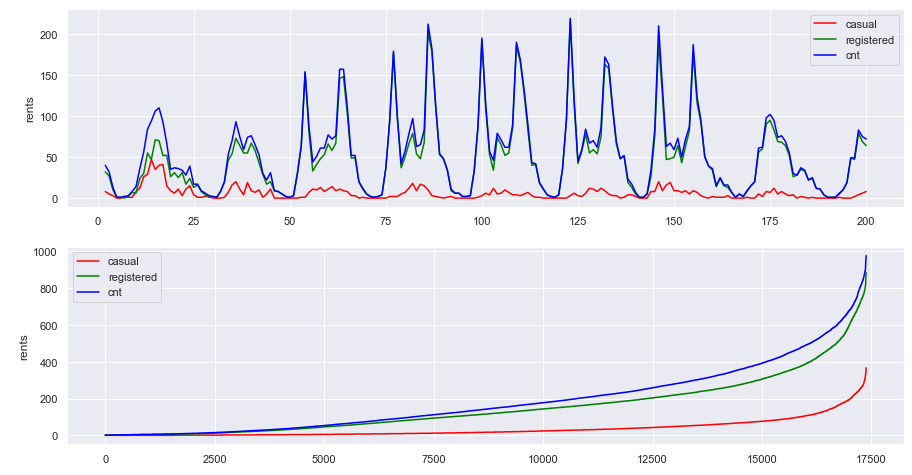
</div>

- Interpreta i explica bé el que mostren els dos plots.
- Seria adequat un model de regressió per predir aquestes variables?, quin tipus de regressió seria més adequat?, de quin grau?, justifica-ho.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importar dades: 
days = pd.read_csv('day.csv')
hour = pd.read_csv('hour.csv')

#### Explorem les dades:

In [3]:
days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
import seaborn as sns

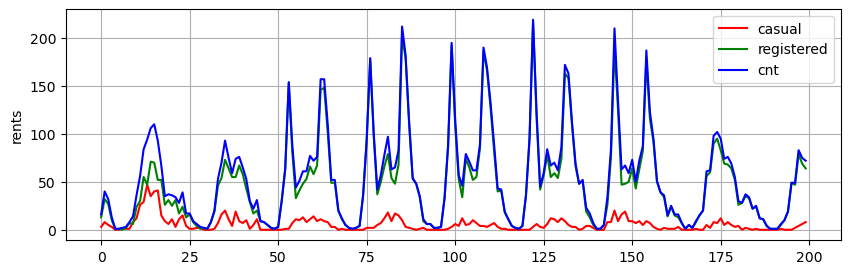

In [8]:
_, axs = plt.subplots(1, 1, figsize=(10, 3))

sns.lineplot(data = hour.casual.iloc[0:200], color='red', ax = axs, label = 'casual')
sns.lineplot(data = hour.registered.iloc[0:200], color='green', ax = axs, label = 'registered')
sns.lineplot(data = hour.cnt.iloc[0:200], color = 'blue', ax = axs, label = 'cnt')

axs.set_ylabel('rents')
axs.legend() 

plt.grid(True)
plt.show()

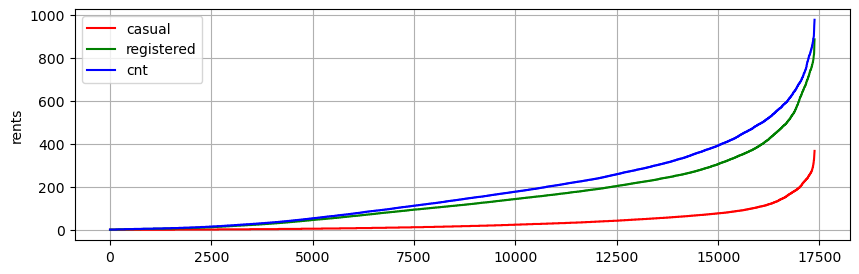

In [9]:
_, axs = plt.subplots(1, 1, figsize=(10, 3))

sns.lineplot(data = hour.casual.sort_values(ignore_index=True), color='red', ax=axs, label='casual')
sns.lineplot(data = hour.registered.sort_values(ignore_index=True), color='green', ax=axs, label='registered')
sns.lineplot(data = hour.cnt.sort_values(ignore_index=True), color='blue', ax=axs, label='cnt')

axs.set_ylabel('rents')
axs.legend() 

plt.grid(True)
plt.show()

#### Interpreta i explica bé el que mostren els dos plots.
- El primer plot: 
    - Mostra el nombre total d'usuaris que han llogat bicis per hora (mostra la tendència). Usuaris casual (han llogat sense estar registrats al nostre sistema) vs usuaris registrats vs cnt, la suma dels dos.
    - Mostra el tota d'usuaris que hem tingut al mida que passen les hores (en aquest cas les 200 primeres hores del dataset). 
    - Podem veure que hi han dos patrons. Un que podem suposar que seran els dies i un altre sub patro que seran les hores.
- El segon plot: 
    - També mostrem el número total de persones que han llogat bicis, però en aquest cas ho fem ordenant el número de persones que han llogat de menys a més al llarg de les hores. Es a dir, agafem totes les hores i mirem el cada valor (casual, registered i cnt) i els ordenem de menys a més.
    - Si la línia estigues estable, voldría dir que a totes les hores hi han hagut les mateixes persones llogant.
    - Segons la nostre grafica, durant la majoría d'hores ordenades, puja a poc a poc i al final puja exponencialment, com que les nostres hores estan ordenades per quantitat de persones que lloguen, vol dir que la majoría d'hores tenen de 150 a 400 i al final (on hi han les hores amb més usuaris), puja drasticament.
    - Això es correspon amb la gràfica de dalt que veiem que en certes hores "punta" hi ha molts més usuaris.
    - Aquestes hores punta es corresponen a la pujada final de la segona gràfica.
    - Petites hores punta de la primera gràfica, representen una gran pujada al final de la segona.

#### Seria adequat un model de regressió per predir aquestes variables?, quin tipus de regressió seria més adequat?, de quin grau?, justifica-ho.
- El primer plot: 
    - No sería adequat el model de regressió perquè hi ha molta variança entre les hores/dies. 
    - Perquè es pogues aplicar hi hauría d'haber una relació lineal (quan creix una, creix l'altre). 
    - No hi ha relació de: quantes més hores (més temps) -> més (rents). Depen d'altres factors també. 
    - Podríem fer una regressió que s'ajustes, però hauría de ser d'un grau tan alt, que tindríem overfitting segur.
- El segon plot: 
    - Aquesta sí, perquè veiem que el comportament de la gràfica està més relacionat: a mesura que pasa el temps, més rentes, però perquè estan ordenades. 
    - Sería una regressió polinomica de grau dos ja que veiem que les dades tenen un comportament parabòlic. 

### Part 2. Fes una predicció de les dades del 2012 bassada en les dades del 2011

- Defineix exactament les variables que faras servir com a predictors. Té sentit com a predictor la variable *daydte*?, perquè?. Cal incloure la variable *yr*?, perquè?
- Separa els sets de train (2011) i de test (2012).
- Defineix un model per inferir les dades de lloguer de bicicletes del 2012 (el total de lloguers, variable *cnt*)
- Avalua el rendiment del model (RMSE i R^2).
- Fes un plot per mesos comparant els valors reals i els predits (com els de l'exemple següent),

<div>
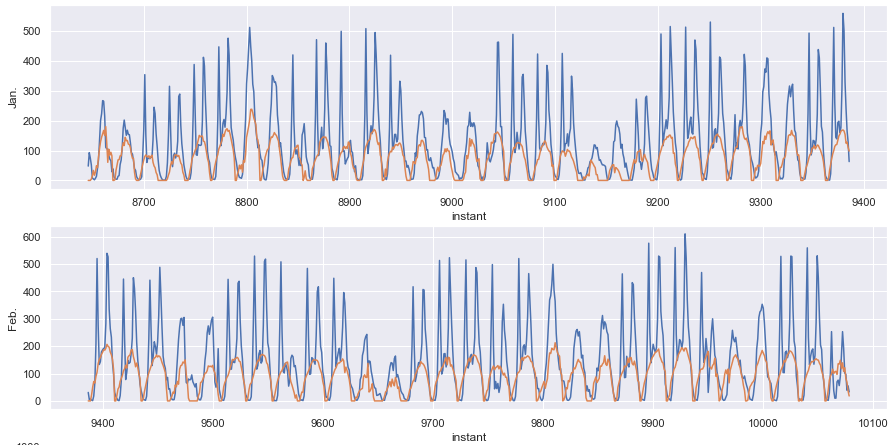
</div>

- Observa que en general la predicció es queda curta. Calcula el total de lloguers de bicicletes per cada any. Quina conclusió es pot extreure?

In [10]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
# Defineix exactament les variables que faras servir com a predictors.

In [12]:
predictors = hour.columns[[0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]
predictors

Index(['instant', 'season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

#### Té sentit com a predictor la variable daydte? Cal incloure la variable yr?, perquè?
- daydte: No perquè ja tenim el mes i el dia de la setmana. No ens cal una altre etiqueta per representar el pas del temps. 
- yr: No perquè estem fent una predicció dels valors que tenen 1 (2012) respecte els valors que tenen 0 (2011). Llavors, les dades que agafarem seràn només les del any 2011 i totes tindràn el mateix valor. 

In [13]:
# Separa els sets de train (2011) i de test (2012).
X_train = hour[hour.yr == 0]
X_test = hour[hour.yr == 1]

In [14]:
# Defineix un model per inferir les dades de lloguer de bicicletes del 2012 (el total de lloguers, variable cnt)

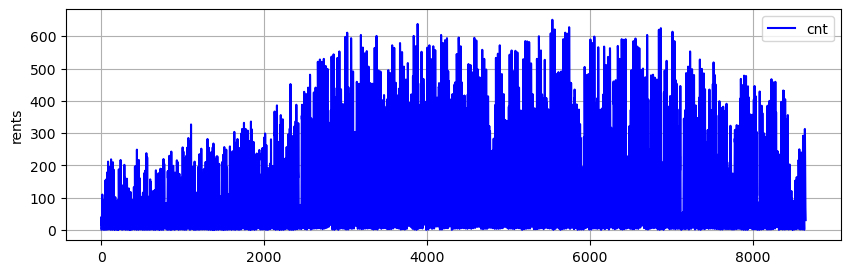

In [15]:
# Mostrem la tendencia: 
_, axs = plt.subplots(1, 1, figsize=(10, 3))

# Ja tenim ordenades les dades per instant
sns.lineplot(data = X_train.cnt, color = 'blue', ax = axs, label = 'cnt')

axs.set_ylabel('rents')
axs.legend() 

plt.grid(True)
plt.show()

#### No podem veure res, fem una corva de regressió per veure'n la tendència d'aquesta gràfica.

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [17]:
# Agafem els instants i fem el reshape per posar-ho dins l'objecte
X = X_train.instant.values.reshape(-1, 1)

In [18]:
Y = X_train.cnt.to_numpy().reshape(-1, 1)

In [19]:
# grau dos per intuició sobre el domini, tendencia a la alça i després baixa (fa una parabola)
degree = 2
pipeline = make_pipeline(PolynomialFeatures(degree = degree, include_bias = False), LinearRegression()).fit(X, Y)

In [20]:
ppt_regression = pipeline.predict(X)

In [21]:
ppt_model = pipeline.steps[1][1]

In [22]:
# La funció de la parabola és:
print('y = %6.4f + %6.4e x + %6.4e x^2' %(ppt_model.intercept_, ppt_model.coef_[0][0], ppt_model.coef_[0][1]))

y = 14.7021 + 7.0484e-02 x + -7.0480e-06 x^2


C:\Users\jaume\AppData\Local\Temp\ipykernel_5364\1478058285.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('y = %6.4f + %6.4e x + %6.4e x^2' %(ppt_model.intercept_, ppt_model.coef_[0][0], ppt_model.coef_[0][1]))


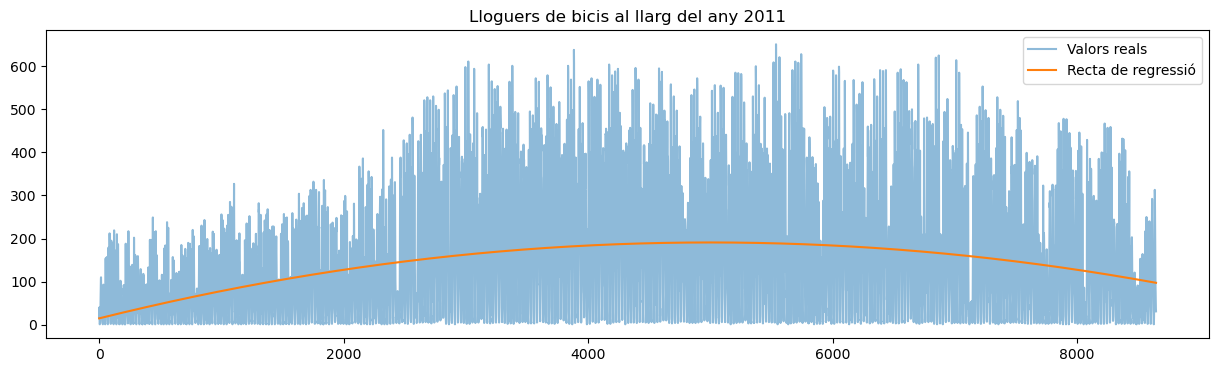

In [23]:
fig, axs = plt.subplots(1, 1, figsize=(15, 4))

axs.set_title('Lloguers de bicis al llarg del any 2011')
axs.plot(X, X_train.cnt, alpha=0.5, label='Valors reals')
axs.plot(X, ppt_regression, label='Recta de regressió')

axs.legend()

plt.show()

#### Veiem com hi ha una tendència que augmenta fins a mitjans de any i després comença a baixar

#### Fem la predicció amb les dades de test:

In [24]:
X_ = X_test.instant.values.reshape(-1, 1)
X_test['predict'] = pipeline.predict(X_)

C:\Users\jaume\AppData\Local\Temp\ipykernel_5364\1442924194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['predict'] = pipeline.predict(X_)


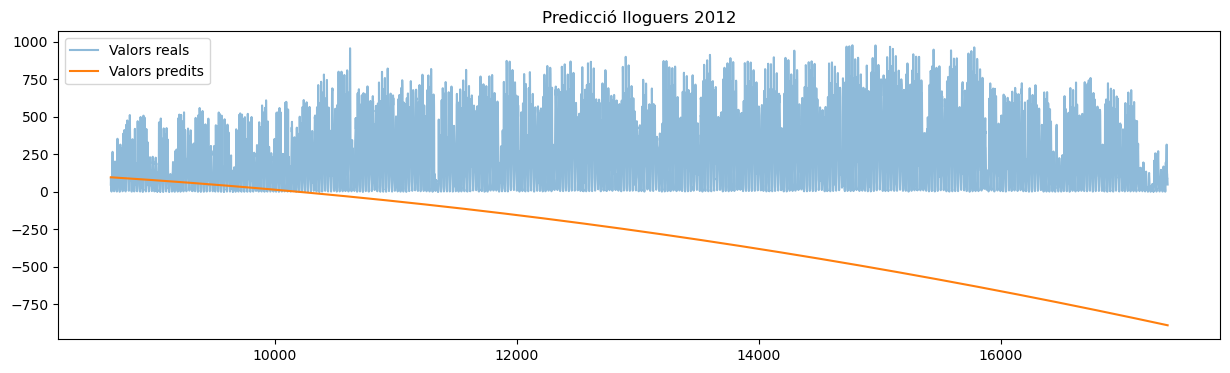

In [25]:
# mostrem les dades reals respecte les dades predites:
fig, axs = plt.subplots(1, 1, figsize=(15, 4))

axs.set_title('Predicció lloguers 2012')
axs.plot(X_, X_test.cnt, alpha=0.5, label='Valors reals')
axs.plot(X_, X_test.predict, label='Valors predits')

axs.legend()

plt.show()

In [26]:
# Avalua el rendiment del model (RMSE i R^2).
from sklearn.metrics import mean_squared_error, r2_score
print('+++ rmse: %4.1f' %mean_squared_error(X_test.cnt, X_test.predict, squared = False))
print('+++ Rsqr: %6.4f' %r2_score(X_test.cnt, X_test.predict, multioutput = 'variance_weighted'))

+++ rmse: 653.3
+++ Rsqr: -8.7791


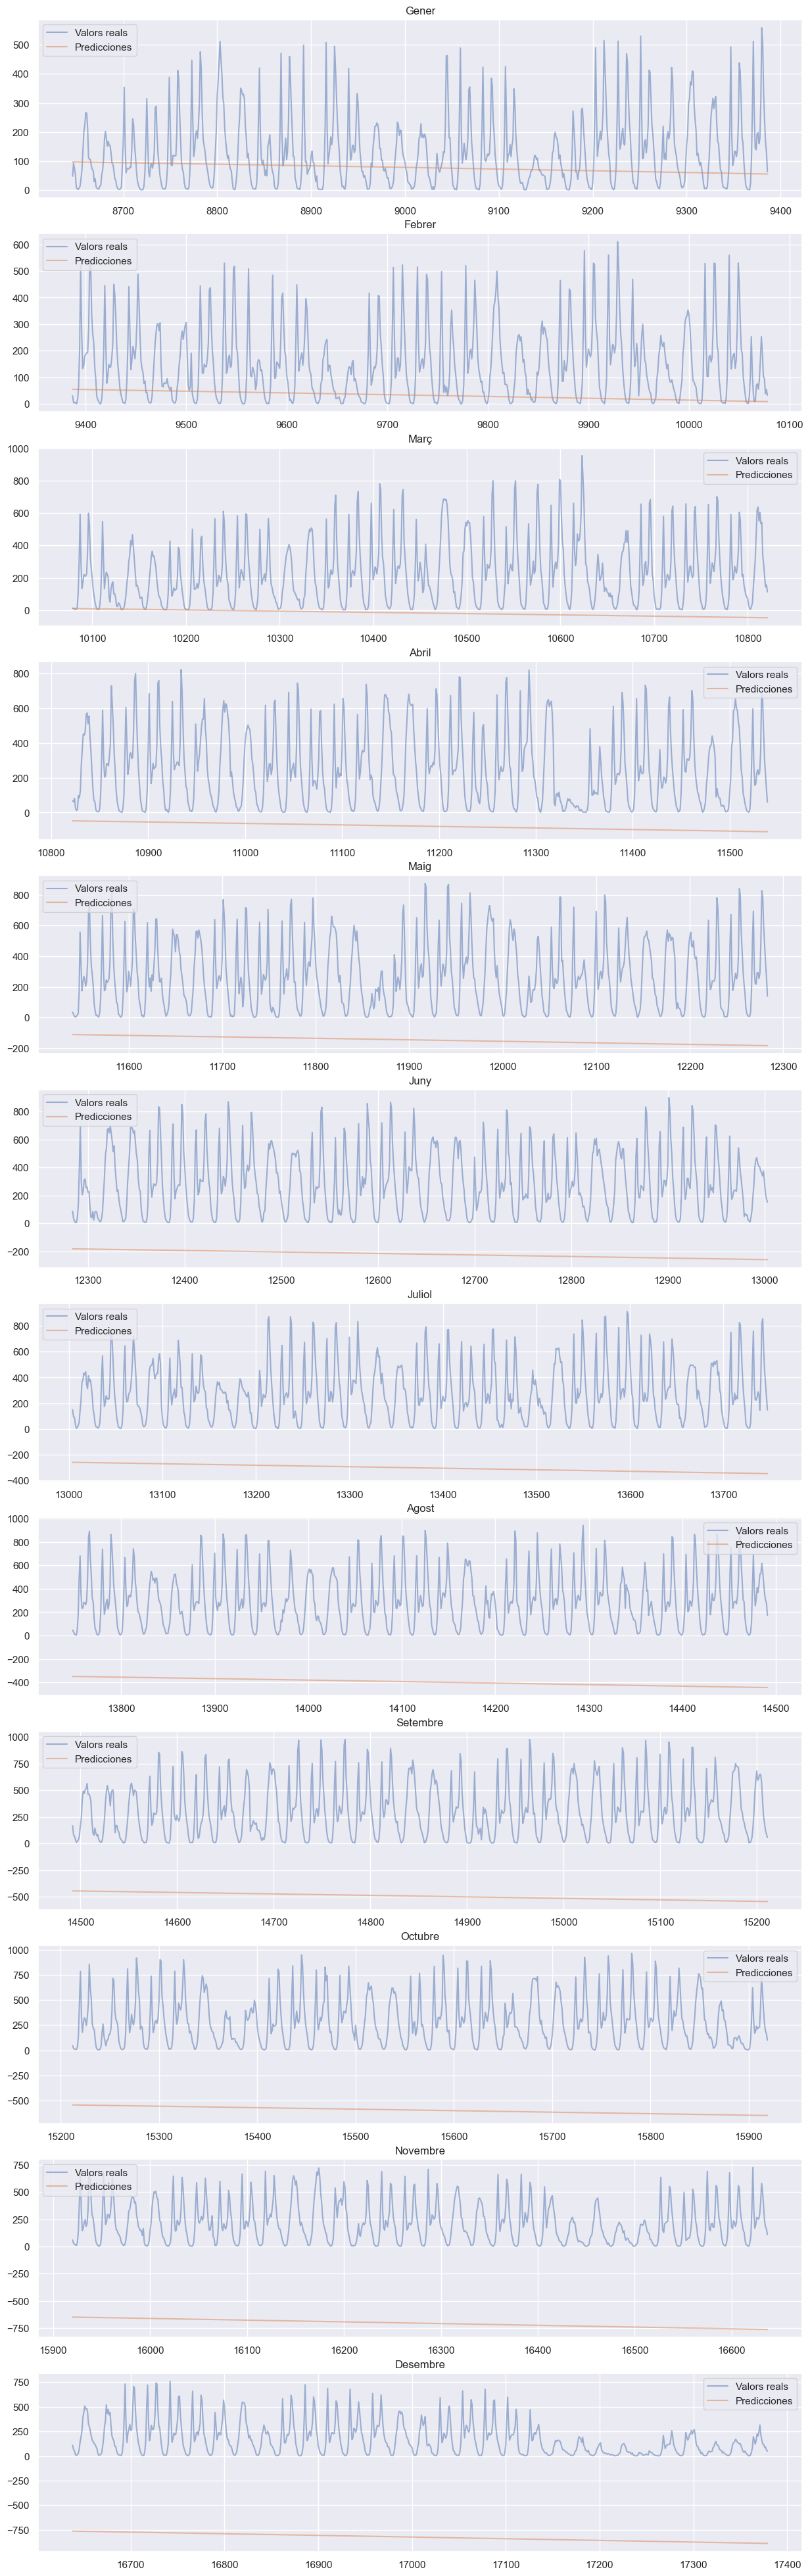

In [74]:
# Fes un plot per mesos comparant els valors reals i els predits (com els de l'exemple següent)
months = ['Gener','Febrer','Març','Abril','Maig','Juny','Juliol','Agost','Setembre','Octubre','Novembre','Desembre']

fig, axs = plt.subplots(len(X_test.mnth.unique()), 1, figsize=(15, 50)) 

for month_name, month_number in zip(months, X_test.mnth.unique()):    
    axs[month_number - 1].set_title(month_name)
    axs[month_number - 1].plot(X_test[X_test['mnth'] == month_number].instant.values, X_test[X_test['mnth'] == month_number].cnt.values, alpha=0.5, label='Valors reals')
    axs[month_number - 1].plot(X_test[X_test['mnth'] == month_number].instant.values, X_test[X_test['mnth'] == month_number].predict.values, alpha=0.5, label='Predicciones')
    axs[month_number - 1].legend()

plt.show()

In [28]:
# Observa que en general la predicció es queda curta. 
# Calcula el total de lloguers de bicicletes per cada any. 
# Quina conclusió es pot extreure?

- Que el model no prediu suficient bé el comportament de la realitat. 
- Hi ha informació que passa a la realitat que el model no és capaç de trobar. 

### Part 3. Bike rental daily prediction

Per a una empresa com aquesta seria segurament molt més útil tenir una predicció del volum de lloguers que poden tenir al llarg d'un dia qualsevol en funció de l'època de l'any, el dia de la setmana i la previsió de temps que hi hagi.

Anal.litza detingudament el codi següent.

Executa repetides vegades el daily_prediction() (cel.la 12). Juga amb els paràmetres i observa els resultats.
- Explica què és la funció daily_prediction() i quins paràmetres té.
    - **Ho he explicat millor amb comentaris al codi però bàsicament: weekday és el parametre que passem, en aquest cas 3, representa el dia de la setmana que volem predir. l'altre parametre es per fer el test_size del train_test split. Normalment sol ser de 0.2 que significa 20% test 80%. En aquest cas, només estem agafant 3 registres per fer test i la resta per fer train. de les dades de train.** 
- Quín tipus de model representa aquesta funció?, quins són els predictors i quina/quines són les variables que s'estan predint?
    - **Tipus de model: model de regressió polinomica de segon grau. Fem servir la pipeline per transformar-ho a un model de regressió lineal equivalent.**
    - **Predictors: X_train[predictors], que son els valors que hi ha al dataframe a les columnes: 'season', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed'.**
   - **Variables que estem predint: Les ventes per hores (X_test[to_predict])**
       - **IMPORTANT! - Són les ventes perquè quan hem creat el dataframe amb les hores, el valor hi ha a cada hora és el total de ventes per cada hora, llavors quan el model predeix el valor que hi ha per aquell camp en concret, estarà predint les ventes, perquè previament li hem posat nosaltres.**
- Explica com s'han aggregat les dades per definir aquest model de predicció.
    - **S'han agregat les dades per hora, així tenim totes les prediccions per totes les hores.**
- Comenta tots els detalls que et semblin més rellevants.

#### data preprocessing

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
#dfH = pd.read_csv('../../data/bike_sharing/hour.csv')
#dfD = pd.read_csv('../../data/bike_sharing/day.csv')

In [32]:
dfH = pd.read_csv('hour.csv')
dfD = pd.read_csv('day.csv')

In [33]:
# Codi per entendre la funció: counts_hour(rows)

# Això sería el parametre rows que ens arribaria quan el groupby s'ha generat per el: 2011-01-01. 
# Ho faría per totes les dates diferents. 
dfH.groupby('dteday').get_group('2011-01-01')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [34]:
dfH.groupby('dteday')

In [35]:
def counts_hour(rows):
    # Agafa un rang de 0 a 23 i en crea un diccionari amb aquests valors inicialitzats a 0.
    # {_h: 0} on h són els valors de 0 a 23 (tots inicialitzats a 0)
    cbyh = {'_%02d' %h: 0 for h in range(24)}
    
    # Ens arriba per parametre cada objecte de pandas resultant de fer el groupby('dteday')
    # És un dataframe com el de fer: dfH.groupby('dteday').get_group('2011-01-01')
    # I la gràcies es que amb el groupby() + apply() ens van arribant tots els grups que hi han en el df original
    
    # El iterrows(), retorna l'index dins el dataframe i una serie amb tots els valors que hi havia.
    # Es pot veure l'exemple on faig el bucle per mostrar row i row['instant']
    
    # Llavors, iterem per tots els registres del dataframe resultant de fer el grouby(data).
    # Són tots els registres que tenim per un dia en concret.
    # Iterem per ells i de cada hora (atribut hr, que va da 0 a 23 (com el nostre diccionari)).
    # Accedim a la mateixa posició del nostre diccionari i li sumem el cnt (total bicis llogades)
    # Com que el contador està inicialitzat a 0 li sumem les bicis que s'han llogat en aquella hora i per tant tindrem: 
    # key -> hora i value: nº bicis llogades
    # Podem fer servir la notació per punt perquè el .itterrows ens retorna una serie de pandas
    for _, row in rows.iterrows(): cbyh['_%02d' %row.hr] += row.cnt
        
    # Crea un nou registre al diccionari anomenat date per guardar el dia en concret que estem evaluant.
    # Això ho fa perquè després al convertir a dataframe fora de la funció, tinguem la informació i es mostri al df final.
    cbyh['date'] = row.dteday
    
    # retornem el diccionari que representarà un registre/row/linia del df final
    return cbyh

In [36]:
# Del dataframe que guarda la informació de les hores, fem un groupby de: 'dteday' que es la data (el dia) del registre. 
# ex: 2011-01-01
# A la agrupació resultant, li apliquem un apply passant per parametre la funció count_hour, la qual ens retorna
# un diccionari on hi ha la clau hora i valor nº de bicis llogades per aquella hora. 
# finalment, convertim el resultat del group by + el apply a una llista amb el .to_list() per transformar-ho a dataframe.
df_cbyh = pd.DataFrame(dfH.groupby('dteday').apply(counts_hour).to_list())

# Basicament estem agrupant per dia i hora i mostrant quantes bicis hem llogat per cada dia i hora. 
df_cbyh

,_00,_01,_02,_03,_04,_05,_06,_07,_08,_09,...,_15,_16,_17,_18,_19,_20,_21,_22,_23,date
0,16,40,32,13,1,1,2,3,8,14,...,110,93,67,35,37,36,34,28,39,2011-01-01
1,17,17,9,6,3,0,2,1,8,20,...,74,76,65,53,30,22,31,9,8,2011-01-02
2,5,2,0,0,1,3,30,64,154,88,...,72,76,157,157,110,52,52,20,12,2011-01-03
3,5,2,1,0,2,4,36,94,179,100,...,65,83,212,182,112,54,48,35,11,2011-01-04
4,6,6,2,0,2,3,33,88,195,115,...,62,89,190,169,132,89,43,42,19,2011-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,3,5,2,1,3,11,45,90,208,133,...,120,174,257,197,117,91,63,44,26,2012-12-27
727,25,9,5,2,4,15,51,112,239,191,...,225,250,271,213,128,97,92,62,59,2012-12-28
728,26,37,19,6,3,3,7,18,44,49,...,129,147,118,110,97,66,60,54,32,2012-12-29
729,41,28,19,15,7,2,8,13,33,74,...,138,133,123,125,102,72,47,36,49,2012-12-30


In [37]:
# Aquí estem unint el dataframe on hi ha tots els registres dels diesj, el quan també té l'atribut: dteday, amb la data
# del registre igual que el dataframe df_cbyh que hem creat, per això hem afegit: 
# cbyh['date'] = row.dteday
# a la funció count_hour(rows)

# el parametre how='inner' agafem totes les columnes

# el validate ens assegura que hi hagi una relació 1 a 1, que nomès hi hagi un registre de cada (segons la documentació)

dfDH = pd.merge(dfD, df_cbyh, how = 'inner', left_on = 'dteday', right_on = 'date', validate = 'one_to_one')

#### Comprovem que els dos dataframes tenen la mateixa dimensio per fer el merge i els mateixos valors

In [38]:
dfD.shape[0], df_cbyh.shape[0]

(731, 731)

In [39]:
(dfD['dteday'].values == df_cbyh['date'].values).all()

True

In [40]:
# Al dataframe dels dies tenim ara una columna que es per cada hora quantes bicis hem llogat aquell dia.
dfDH.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,_15,_16,_17,_18,_19,_20,_21,_22,_23,date
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,110,93,67,35,37,36,34,28,39,2011-01-01
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,74,76,65,53,30,22,31,9,8,2011-01-02
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,72,76,157,157,110,52,52,20,12,2011-01-03
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,65,83,212,182,112,54,48,35,11,2011-01-04
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,62,89,190,169,132,89,43,42,19,2011-01-05


#### model building

In [41]:
weekdays = {i: name for i, name in enumerate(['Sunday', 'Monday', 'Tuesday', 'Wendsday', 'Thursday', 'Friday', 'Saturday'])}

In [42]:
weekdays

{0: 'Sunday',
 1: 'Monday',
 2: 'Tuesday',
 3: 'Wendsday',
 4: 'Thursday',
 5: 'Friday',
 6: 'Saturday'}

In [43]:
predictors = dfDH.columns[[2, 4, 5, 7, 8, 9, 10, 11, 12]]
predictors

Index(['season', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed'],
      dtype='object')

In [44]:
to_predict = dfDH.columns[16:40]
to_predict

Index(['_00', '_01', '_02', '_03', '_04', '_05', '_06', '_07', '_08', '_09',
       '_10', '_11', '_12', '_13', '_14', '_15', '_16', '_17', '_18', '_19',
       '_20', '_21', '_22', '_23'],
      dtype='object')

In [45]:
# weekday és el parametre que passem, en aquest cas 3, representa el dia de la setmana que volem predir.
# l'altre parametre es per fer el test_size del train_test split. Normalment sol ser de 0.2 que significa 20% test 80%
# En aquest cas, nomès estem agafant 3 registres per fer test i la resta per fer train.
# de les dades de train. 
def daily_prediction(weekday, test_size = 3):
    
    # Separem les dades amb la funció train_test_split del sklearn.
    # El primer parametre de la funció train_test_split es el dataframe d'on volem treure les dades.
    # Llavors, estem agafant els registres del dfDH on la columna weekday sigui el que li estem diguent, 
    # Això ho fem perque volem nomès els registres amb el dia de la setmana que li indiquem
    X_train, X_test = train_test_split(dfDH.loc[(dfDH.weekday == weekday)], test_size = test_size)
    
    # Al fer el train/test agafa valors aleatoris, en resatejem l'index.
    X_test.reset_index(inplace = True)
    
    # Creem una polinomica de grau dos amb una pipeline això ens permet descomposar els exponents amb components de grau 1
    # i així fem una regressió lineal múltiple.
    model = make_pipeline(PolynomialFeatures(degree = 2, include_bias = False), LinearRegression())
    
    # Entrenem el model X solia ser una variable però ara és un vector.
    # Estem fent una predicció multiple.
    # Això vol dir que estem fent fit i després predint per totes les hores a la vegada.
    model.fit(X_train[predictors], X_train[to_predict])
    
    # Mirem amb les dades de test quina predicció tenim (per cada hora, quantes ventes tindrem).
    # En base els predictors que li passem, ens dirà quina predicció tenim per cada hora.
    prediction = model.predict(X_test[predictors])
    
    # Tenim una matriu de zeros igual que la predicció que hem fet, agafem el valor maxim entre la predicció i 0
    # Assegurem que no hi hagin prediccions negatives
    prediction = np.maximum(prediction, np.zeros(prediction.shape))
    
    # Creem tants plots com registres de test tinguem. cada plot conté les dues gràfiques (blau, tronja)
    _, axs = plt.subplots(test_size, 1, figsize = (15, 4 *test_size))
    for i in range(test_size):
        axs[i].set_title('predictions for %s' %weekdays[weekday])
        # Dibuixem a les x les hores (to_predict) i a l'eix y les ventes reals que hi van haber aquella hora.
        axs[i].plot(to_predict, X_test.loc[i, to_predict], label='Real')
        # Dibuixem a les x les hores (to_predict) i a l'eix y la predicció del model de ventes a aqeulla hora
        axs[i].plot(to_predict, prediction[i], label='Predit')
        # Afegim una llejenda perquè es vegi millor que es cada cosa.
        axs[i].legend()
        
    # Mostra el rmse que es l'error mitjà del model. (error amb la mateixa escala)
    # Mostra el R^2 per evaluar el model (com més proper a 1 millor)
    print('+++ rmse: %4.1f' %mean_squared_error(X_test[to_predict], prediction, squared = False))
    
    # Hem d'agregar tots els errors per fer el r^2, per evaluar les desviacions respecte el seu valor. 
    # multioutput = 'variance_weighted', es perque fem predicció multiple. Pesa per la variança asociada a
    # cada un dels valors. 
    print('+++ Rsqr: %6.4f' %r2_score(X_test[to_predict], prediction, multioutput = 'variance_weighted'))
    
    # retorna el x_test així es mostrarà per la pantalla també. 
    return X_test

+++ rmse: 68.8
+++ Rsqr: 0.4669


,index,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,...,_15,_16,_17,_18,_19,_20,_21,_22,_23,date
0,515,516,2012-05-30,2,1,5,0,3,1,2,...,275,398,839,796,556,431,304,217,160,2012-05-30
1,46,47,2011-02-16,1,0,2,0,3,1,1,...,117,122,255,222,161,118,92,73,33,2011-02-16
2,543,544,2012-06-27,3,1,6,0,3,1,1,...,249,392,843,804,643,445,367,297,159,2012-06-27


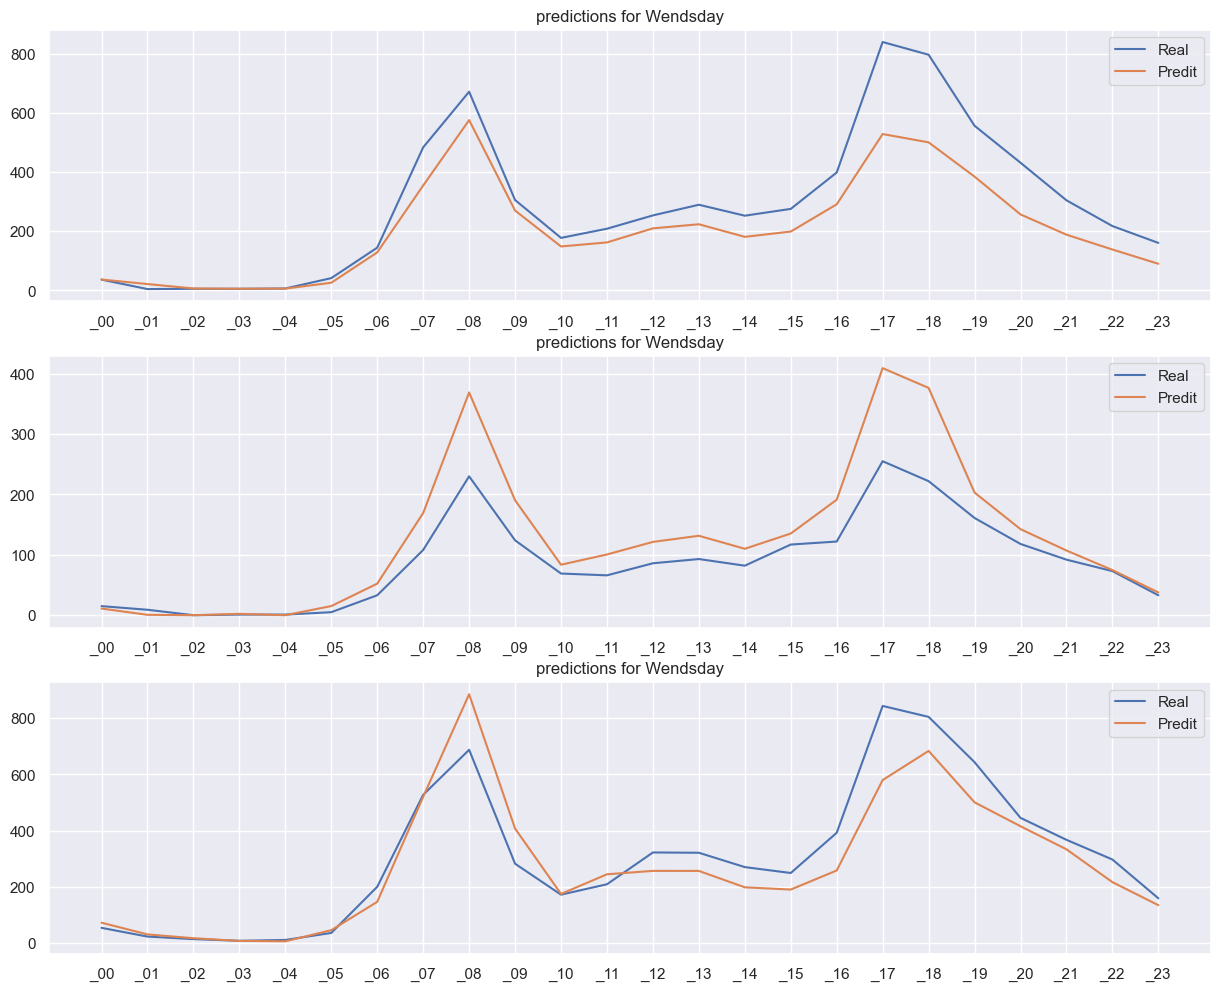

In [46]:
daily_prediction(3)

### Part 4. Per si algú li sobra temps:

- Construeix un predictor igual que l'anterior pel número de lloguers dels usuaris registrats (variable *registered*)